In [1]:
# Step 1: Load Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

Explanation: In this step, I imported all the essential libraries and modules for building, training, evaluating, and visualizing a CNN model using the MNIST dataset:

numpy is used for efficient numerical and matrix operations.

matplotlib.pyplot and seaborn help with visualizing sample images, training metrics, and performance analysis (like confusion matrices).

tensorflow.keras is used to load the dataset and construct a CNN with layers like Conv2D, MaxPooling2D, and Dense.

to_categorical is used to one-hot encode the labels, a requirement for multi-class classification.

EarlyStopping prevents overfitting by stopping training early if validation performance doesn't improve.

confusion_matrix from sklearn helps assess how well the model is performing across all digit classes.

In [3]:
# Step 2: Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In this step, I loaded the MNIST dataset directly from Keras. This dataset contains 70,000 grayscale images of handwritten digits (0 through 9), each of size 28x28 pixels:

train_images and train_labels contain 60,000 samples used for training and validation.

test_images and test_labels contain 10,000 samples used for final model evaluation.

Loading it this way saves time because Keras automatically downloads and formats the dataset for us.

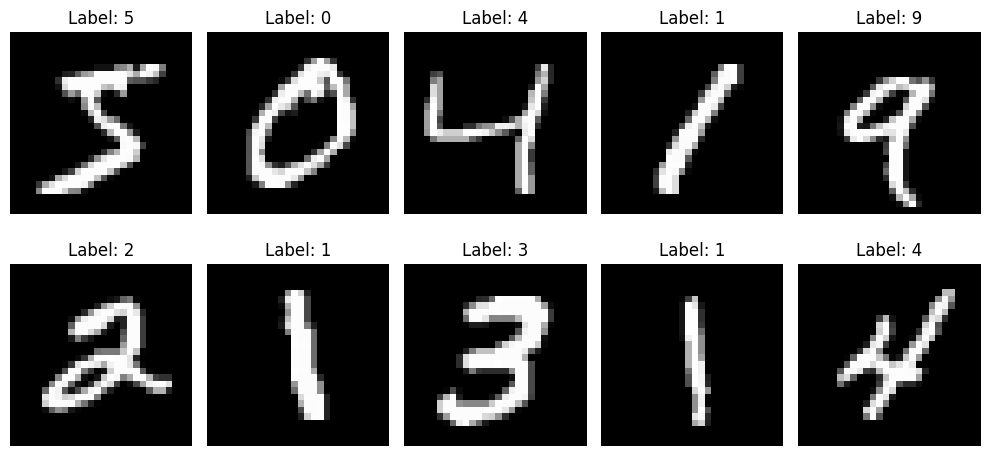

In [4]:
# Step 3: Visualize 10 sample images from the training set
plt.figure(figsize=(10, 5))  # Size of the entire figure

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns, current index
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Ensure correct shape
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Remove axis ticks

plt.tight_layout()  # Adjust spacing
plt.show()

Before preprocessing or training, it's important to visually inspect a few samples to understand what the model will be learning from.

This plots the first 10 images in a 2x5 grid.

Each image is reshaped to ensure it's in 2D format (28×28) and shown in grayscale.

I display the true label of each image to confirm that the data and labels are correctly paired.

This step helps us validate dataset integrity and builds intuition about the classification task.

In [5]:
# Step 4:  Normalize pixel values to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

The original MNIST images contain pixel values ranging from 0 to 255 (uint8 format). To improve model performance and training stability:

We scale these values to a range between 0 and 1 by dividing by 255.

Neural networks converge faster and more reliably when input features are normalized.

This also helps avoid issues like exploding or vanishing gradients.

This is a standard preprocessing step in most image-based deep learning tasks.

In [6]:
# Step 5: Reshape to include channel dimension (28, 28, 1)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

MNIST images are grayscale with shape (28, 28).

However, Convolutional Neural Networks (CNNs) in Keras expect 4D input: (batch_size, height, width, channels).

By reshaping to (28, 28, 1), we explicitly specify the single channel (grayscale), which is required for convolutional layers to process the images correctly.

-1 lets NumPy automatically calculate the batch size based on the original array.

This step ensures the data is in the right shape for our CNN model.

In [7]:
# Step 6: Split training data into train and validation sets (90%/10%)
validation_cutoff = int(train_images.shape[0] * 0.9)
img_train = train_images[:validation_cutoff]
img_valid = train_images[validation_cutoff:]
lbl_train = train_labels[:validation_cutoff]
lbl_valid = train_labels[validation_cutoff:]
img_test = test_images.copy()
lbl_test = test_labels.copy()

I manually split the training dataset into:

90% for training the model (img_train, lbl_train)

10% for validation during training (img_valid, lbl_valid)

Validation data helps us monitor performance on unseen data and detect overfitting during training.

The test set (img_test, lbl_test) remains untouched and is only used for final evaluation after training.

This approach ensures a robust training pipeline by validating model performance while keeping the test data truly unseen.

In [8]:
# Step 7: One-hot encode the labels
lbl_train = to_categorical(lbl_train, 10)
lbl_valid = to_categorical(lbl_valid, 10)
lbl_test = to_categorical(lbl_test, 10)

The MNIST labels are originally single integers from 0 to 9, representing the digit in the image.

One-hot encoding converts these into binary vectors with 10 positions (one for each digit).

Example: Label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

This format is required for categorical classification using the categorical_crossentropy loss function.

By doing this, we align our labels with the output of the neural network, which will predict probabilities across the 10 digit classes.

In [9]:
# Step 8: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Add dropout after first convolution block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Add dropout after second convolution block
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/Users/akinsholaakinade/Desktop/mnist_cnn_classifier/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 08:37:38.526899: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-14 08:37:38.527513: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-14 08:37:38.528017: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-14 08:37:38.528644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-14 08:37:38.529131: I tensorflow/core/common_runtime/pluggable_dev

Building the Convolutional Neural Network (CNN):

Conv2D: This layer applies convolutional filters to the input image.

32 filters of size (3, 3) are used in the first layer to extract low-level features (edges, shapes).

64 filters are applied in the second convolution layer to capture more complex patterns.

ReLU activation introduces non-linearity to help the model learn complex relationships.

MaxPooling2D: This layer reduces the spatial dimensions of the image while retaining important information.

Pooling reduces computational complexity and helps prevent overfitting by providing spatial invariance (detecting patterns in different parts of the image).

Flatten: The 2D matrix output from the convolutional layers is "flattened" into a 1D vector, making it suitable for fully connected layers.

Dense: This is a fully connected layer:

128 neurons with ReLU activation help the model learn complex patterns from the features extracted by the convolutional layers.

Dropout: A dropout layer with a rate of 0.5 randomly disables 50% of neurons during training, which reduces overfitting.

Final Dense Layer: The last layer has 10 neurons corresponding to the 10 classes (digits 0–9), with a softmax activation to output class probabilities.

Softmax ensures the output is a valid probability distribution across the 10 classes.

In [10]:
# Step 9: Show the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

model.summary():

This command prints out a summary of the CNN architecture you have built. It provides a detailed view of:

Layer Types: Each layer used (e.g., Conv2D, MaxPooling2D, Dense, etc.).

Output Shapes: The shape of the output at each layer, showing how the image or feature map changes as it passes through the network.

Number of Parameters: The number of trainable parameters in each layer. This is important to gauge the complexity and the number of weights the model will learn during training.

Total Parameters: The overall count of trainable parameters in the entire model, which tells you how complex the model is.

This command helps you ensure that the architecture is built as intended, and also gives you insights into the number of parameters, which is useful for understanding the model’s capacity.

In [11]:
# Step 10: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile():

This step configures the model for training by specifying:

Optimizer: The optimization algorithm that will update the model weights during training.

'adam' is a popular optimizer that adapts the learning rate based on the gradient of the loss function. It's widely used because it works well for many problems.

Loss Function: This determines how well the model's predictions match the true labels. For a classification task like MNIST (multi-class classification), we use categorical_crossentropy.

This loss function calculates the difference between the true labels (in one-hot encoded form) and the predicted probabilities of the classes.

Metrics: Metrics help to evaluate the performance of the model. 'accuracy' is used here, which measures the proportion of correct predictions.

Why this is important: The optimizer controls how the model learns. Adam is efficient for training deep learning models and often performs well with little tuning.

The loss function ensures that the model minimizes the error in predicting the class probabilities.

Accuracy is a straightforward and widely-used metric to evaluate how well the model performs in classification tasks.

This step prepares the model for training, where the actual learning will begin once you start fitting the model on data



In [12]:
# Step 11: Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

EarlyStopping is a technique used to stop the training process before the model overfits. It's a form of regularization that prevents wasting time training the model when it's no longer improving.

monitor='val_loss': This means the training will monitor the validation loss. If the validation loss doesn't improve for a set number of epochs, training will stop. This helps prevent overfitting and saves computation time.

patience=3: If the validation loss doesn't improve for 3 consecutive epochs, training will be stopped early. If you set this to 0, training will stop as soon as the validation loss doesn’t improve in the current epoch.

restore_best_weights=True: This means that the model will revert to the weights from the best epoch (the epoch with the lowest validation loss), even if it stops early. This ensures that you always get the best version of the model, rather than a model that may have started overfitting.

Why this is important: EarlyStopping prevents the model from continuing to train once it reaches a point of diminishing returns.

It helps to save computational resources and ensures that you don't overtrain and start fitting noise or overfitting to the training data.

It improves the model’s generalization by selecting the best performing model on the validation set.

In [13]:
# Step 12: Train the Model
history = model.fit(img_train, lbl_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(img_valid, lbl_valid),
                    callbacks=[early_stop])

Epoch 1/10


2025-05-14 08:41:41.937980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7772 - loss: 0.6821 - val_accuracy: 0.9785 - val_loss: 0.0745
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9525 - loss: 0.1713 - val_accuracy: 0.9823 - val_loss: 0.0684
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9557 - loss: 0.1807 - val_accuracy: 0.9868 - val_loss: 0.0648
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9590 - loss: 0.1888 - val_accuracy: 0.9877 - val_loss: 0.0748
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9574 - loss: 0.2297 - val_accuracy: 0.9858 - val_loss: 0.0875
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9621 - loss: 0.2426 - val_accuracy: 0.9837 - val_loss: 0.1318


This cell initiates the training process for CNN model using the training data (img_train, lbl_train). It trains the model over 10 epochs, with a batch size of 64, and uses a validation set (img_valid, lbl_valid) to monitor performance during training.

epochs=10: The model will go through the entire training data 10 times. In practice, the number of epochs is adjusted based on how well the model is learning and if the performance improves or stabilizes.

batch_size=64: The training data is divided into batches of 64 samples. After each batch, the model updates its weights. A larger batch size can improve performance but may increase memory consumption, whereas smaller batches may lead to faster but noisier training.

validation_data=(img_valid, lbl_valid): This is the validation data used to evaluate the model at the end of each epoch. It helps to check whether the model is overfitting (i.e., performing well on the training data but not on unseen validation data).

callbacks=[early_stop]: This adds the EarlyStopping callback defined earlier. If the validation loss doesn't improve for 3 consecutive epochs, the training process will stop early.

Why this is important: Model Training: This step involves optimizing the model’s weights so that it minimizes the loss function (cross-entropy in this case) and improves performance on the validation set.

Early Stopping: Helps ensure that the model doesn’t overfit and stops training when it reaches its best generalization capability.

Validation Set: By using validation data, we ensure that the model’s performance is checked on data it hasn’t seen, which helps track generalization performance.

This is the core of the model training. Once training is complete, you can visualize the training history, evaluate the model on test data, and further analyze performance.

In [15]:
# Step 13: Evaluate the Model
#evaluation = model.evaluate(img_test, lbl_test)
#print(evaluation)

evaluation = model.evaluate(img_test, lbl_test)
# Print Test Loss and Test Accuracy
print(f"\nTest Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9809 - loss: 0.0733

Test Loss: 0.0609
Test Accuracy: 98.38%


This cell evaluates the trained CNN model on the test set (img_test, lbl_test) to see how well the model performs on unseen data after training.

model.evaluate(): This method computes the loss and accuracy on the test dataset. It returns two values:

Loss: The value of the loss function (categorical cross-entropy here) calculated on the test set. Lower loss means the model’s predictions are closer to the true values.

Accuracy: The percentage of correct predictions made by the model on the test set.

print(f"\nTest Loss: {evaluation[0]:.4f}"): Prints the test loss value, formatted to four decimal places.

print(f"Test Accuracy: {evaluation[1]*100:.2f}%"): Prints the test accuracy as a percentage (multiplied by 100 for clarity).

Why this is important: Evaluating on Test Data: It’s essential to test the model on data that it has not seen before (test set). This helps you understand if the model can generalize well to new, unseen data.

Loss and Accuracy: These two metrics give us an indication of the model’s performance. The goal is to minimize loss and maximize accuracy.

By evaluating the model, you get a quantitative measure of its performance, which you can then compare with other models or use to decide if further tuning is needed.

NOTE BOARD:

"In this step, I evaluate the trained model on the test set to determine its performance. The evaluate function provides both loss and accuracy, which allows me to assess how well the model generalizes to new, unseen data. Based on these metrics, I can confidently analyze the model’s effectiveness and identify potential areas for improvement."

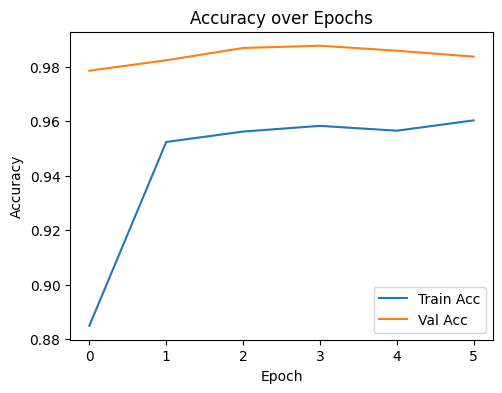

In [16]:
# Step 14: Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

This cell is used to plot the training and validation accuracy over the epochs during model training. The purpose of this visualization is to track how well the model is learning and if it’s overfitting.

history.history['accuracy']: Tracks the accuracy of the model on the training set during each epoch.

history.history['val_accuracy']: Tracks the accuracy of the model on the validation set during each epoch.

plt.plot(): Plots these accuracy values for training and validation over the epochs.

plt.legend(): Displays a legend to differentiate the lines representing training and validation accuracy.

Why this is important: Training vs. Validation Accuracy: By comparing the training and validation accuracy, you can identify whether your model is overfitting. If the training accuracy keeps increasing while validation accuracy plateaus or decreases, it suggests overfitting.

Epochs: By observing how accuracy evolves over epochs, you can tell if your model is learning effectively or if it’s plateauing too early (in which case, you might need to adjust hyperparameters or the model architecture).

NOTE BOARD:

"In this step, I visualize the accuracy of both the training and validation datasets over multiple epochs. This plot allows me to monitor the model’s progress during training and ensure that it is not overfitting. A good model will have a steady improvement in both training and validation accuracy."

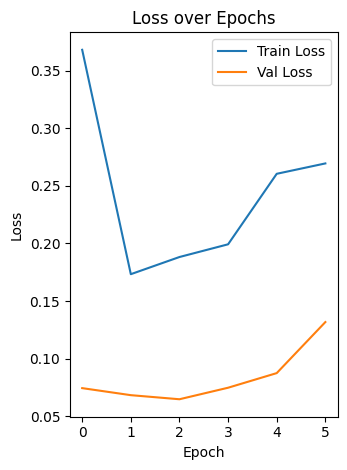

In [17]:
# Step 15: Visualize Training History - Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

This cell is used to plot the training and validation loss values over the epochs during model training. This helps track how well the model is minimizing the loss function (categorical cross-entropy in this case).

history.history['loss']: This contains the loss values for the training set during each epoch.

history.history['val_loss']: This contains the loss values for the validation set during each epoch.

plt.plot(): This function is used to plot these loss values for both the training and validation sets over the epochs.

plt.legend(): Displays the legend to differentiate between the two loss curves.

Why this is important: Training vs. Validation Loss: By comparing training and validation loss, we can assess if the model is effectively learning or overfitting. A good model should show decreasing loss for both training and validation.

Loss Trends: If the training loss keeps decreasing while the validation loss starts increasing, it may indicate overfitting. This is a critical sign that adjustments to the model or training parameters might be needed.

NOTE BOARD:

"In this step, I visualize the loss for both training and validation datasets over multiple epochs. Observing the loss helps me track how well the model is minimizing the error. A decrease in both training and validation loss indicates that the model is learning effectively. If the validation loss starts to increase while the training loss continues to decrease, it might be a sign of overfitting."

In [18]:
# Step 16: Confusion Matrix
# Get predictions on the test set
pred_labels = model.predict(img_test).argmax(axis=1)  # Ensure pred_labels is defined here
true_labels = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


This cell performs two crucial steps to assess the performance of the model:

Predictions (pred_labels):

model.predict(img_test) generates the raw predicted probabilities for each class (digits 0-9).

.argmax(axis=1) selects the index of the highest predicted value for each test image, which corresponds to the predicted class.

True Labels (true_labels):

The actual labels from the test set (test_labels) are used for comparison against the predictions.

Why this is important: Confusion Matrix: The predictions (pred_labels) and true labels (true_labels) are required to generate the confusion matrix in the following step. The confusion matrix provides insights into which digits are being misclassified and how often, giving you a better understanding of the model’s performance for each individual class (digit).

NOTE BOARD:

"In this step, I generate predictions on the test dataset and compare them with the true labels. The argmax function ensures we extract the predicted class with the highest probability for each test sample. These predictions will be used to construct the confusion matrix, which allows me to evaluate how well the model classifies each digit."

In [19]:
# Step 17: Create confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

This step calculates the confusion matrix by comparing the true_labels (actual labels) with pred_labels (predicted labels).

Confusion Matrix:

The confusion matrix is a table that describes the performance of the classification model.

It shows the counts of true positives, false positives, true negatives, and false negatives for each class (in this case, digits 0-9).

Why this is important: The confusion matrix gives a detailed view of model performance by showing which classes (digits) are being misclassified.

This allows for more targeted improvements, such as identifying whether the model struggles with specific digits (e.g., misclassifying 3 as 5).

NOTE BOARD:

"In this step, I generate the confusion matrix, which compares the model's predictions (pred_labels) to the true labels (true_labels). The matrix will help me analyze which digits the model is misclassifying, allowing me to understand its strengths and weaknesses more clearly."

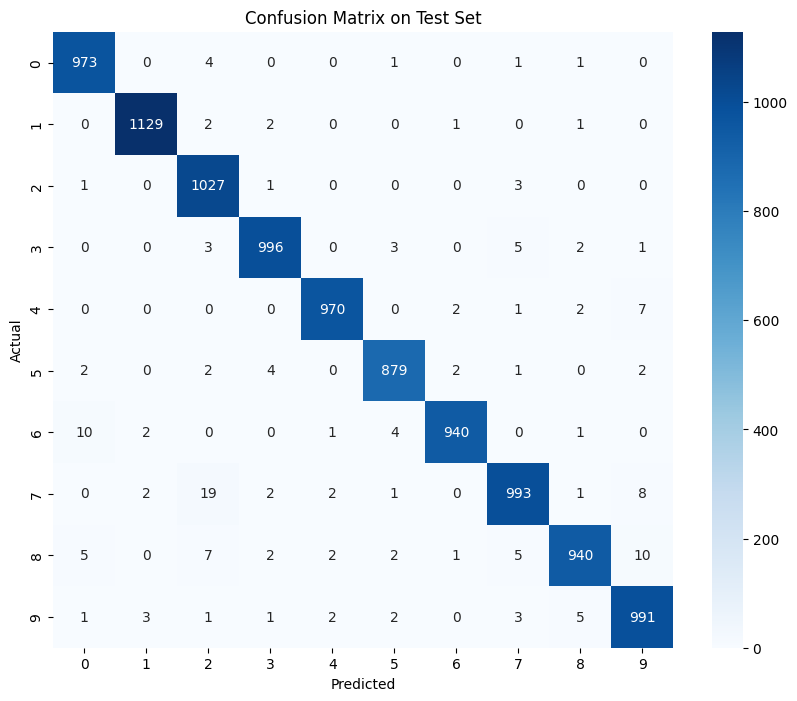

In [20]:
# Step 18: Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This step visualizes the confusion matrix using a heatmap, which is generated by seaborn.heatmap(). The matrix itself shows the count of predicted vs actual labels.

Confusion Matrix Heatmap:

sns.heatmap() is used to display the confusion matrix in a color-coded grid.

annot=True ensures that the numerical values are displayed inside the grid cells.

fmt='d' formats the annotation to show integers (since it's a count).

cmap='Blues' uses a blue color palette for better visual differentiation.

Why this is important: Visualizing the confusion matrix helps identify patterns of misclassification more clearly.

By color-coding, it becomes easier to identify which digits the model confuses with others, especially if misclassifications are clustered.

NOTE BOARD:

"In this step, I visualize the confusion matrix using a heatmap, where darker blue shades represent higher counts. This gives a clearer visual understanding of how well the model classifies each digit, highlighting areas where the model performs well and where it struggles."

In [21]:
# Step 19: Visualize a few misclassified images
wrong_indices = np.where(pred_labels != true_labels)[0][:10]  # Find misclassified images

This line of code identifies misclassified images. It uses np.where() to find the indices where the predicted labels (pred_labels) are not equal to the true labels (true_labels).

np.where(pred_labels != true_labels) returns an array of indices where the model made an incorrect prediction.

[0][:10] slices this array to get the first 10 misclassified indices.

Why this is important: Visualizing misclassified images allows you to inspect how the model is making mistakes.

Helps in diagnosing specific types of errors, like misclassifying 3s as 5s, or 8s as 9s.

You can check if the model is struggling with certain patterns in the data, leading to insights for potential improvements.

NOTE BOARD:

"In this step, I identify and display the first 10 images where the model's predictions did not match the true labels. This allows me to inspect where the model is making mistakes, which is essential for evaluating and refining model performance. By visualizing the errors, I can understand if the model is consistently confusing certain digits."

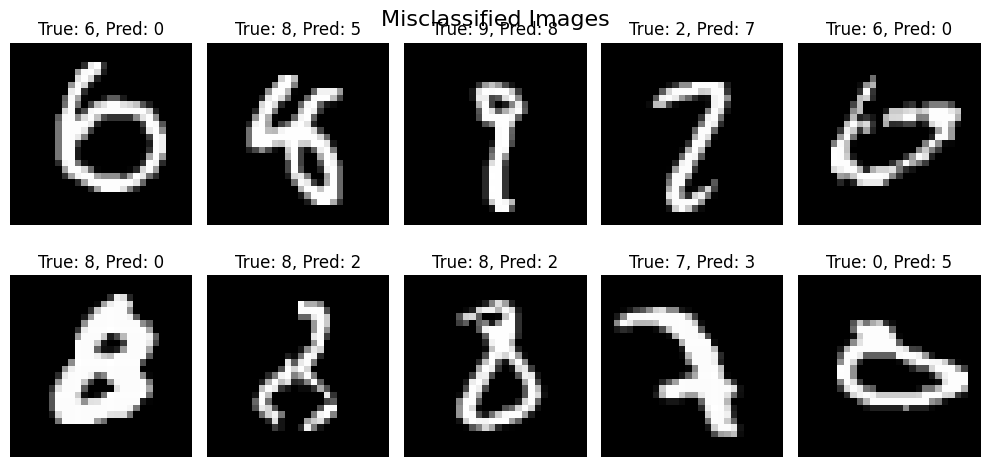

In [22]:
# Step 20: Create a plot for misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[idx]}, Pred: {pred_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Misclassified Images", fontsize=16)
plt.show()

This section of code displays the misclassified images along with the true and predicted labels.

plt.subplot(2, 5, i + 1) sets up a grid of 2 rows and 5 columns for plotting.

plt.imshow(test_images[idx].reshape(28, 28), cmap='gray') plots each image from the wrong_indices list.

plt.title(f"True: {true_labels[idx]}, Pred: {pred_labels[idx]}") shows both the true and predicted labels as the title for each image.

plt.axis('off') removes the axis ticks for a cleaner presentation.

Why this is important: Visualizing misclassified images helps to directly assess the areas where the model is making incorrect predictions.

It gives a clear picture of which images the model struggles with, such as difficult digits or poorly aligned handwriting.

NOTE BOARD:
"This step visualizes the first 10 misclassified images by showing both the true label and the model’s predicted label. By inspecting these misclassified images, I can visually identify the areas where the model's performance can be improved. This type of analysis helps in understanding model behavior and informs future improvements."

In [23]:
# Step 21: Predict and Compare First 20 Digits
sample_preds = model.predict(img_test[:20]).argmax(axis=1)
print("Predictions:", sample_preds)
print("Ground Truth:", test_labels[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Ground Truth: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


This step predicts the labels of the first 20 test images and compares them with the actual ground truth.

model.predict(img_test[:20]) generates predictions for the first 20 images from the test set.

.argmax(axis=1) converts the predicted class probabilities into class labels (the index of the maximum probability).

print("Predictions:", sample_preds) displays the predicted labels for the first 20 test images.

print("Ground Truth:", test_labels[:20]) displays the actual labels for these images to allow a comparison.

Why this is important: This allows a quick check on how well the model is performing on some of the test data.

By comparing the predicted labels with the actual ones, we can get a sense of how well the model is generalizing to new, unseen data.

NOTE BOARD:

"In this step, I predicted the labels for the first 20 test images and compared the model’s predictions with the ground truth. This step serves as a quick check to assess the accuracy and effectiveness of the trained model on unseen data. By inspecting both predicted and true labels, I can ensure that the model is correctly identifying the digits."

SUMMARY
This step allows you to predict and compare the model's performance on the first 20 test samples, which provides a simple validation of how well the model is doing after training.

Here's a quick recap of the steps we've gone through:

Loading Libraries: Necessary Python libraries and TensorFlow/Keras modules.

Loading and Preprocessing Data: Preparing the MNIST dataset, normalizing, reshaping, and splitting it.

Building the Model: Setting up the CNN architecture, compiling it, and defining the training parameters.

Training the Model: Training the model with the training set and validating it on the validation set.

Evaluating the Model: Evaluating test accuracy and loss, and visualizing performance over epochs.

Visualizing Misclassifications: Using confusion matrices and misclassified images to analyze the model's mistakes.

Prediction and Ground Truth Comparison: Finally, comparing the predictions on test data with actual labels.

Conclusion: Step 21 is indeed the last step, and it provides a final validation of the model by showcasing its performance on a subset of the test set. This allows you to visually confirm how accurate the model is and whether it is successfully identifying the digits.